In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [24]:
import matplotlib.pyplot as plt

In [40]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    'dogs_vs_cats/train',       
    seed=123,
    image_size=(128,128),
    batch_size=32,
    label_mode='int'      
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    'dogs_vs_cats/test',     
    seed=123,
    image_size=(128,128),
    batch_size=32,
    label_mode='int'
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [48]:
import tensorflow as tf

def preprocess_image(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    if image.shape[-1] != 3:
        image = tf.image.grayscale_to_rgb(image)
    return image, label
train_ds = train_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)

In [49]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

In [50]:
model = Sequential()

In [51]:
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(3,3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_11 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 activation_11 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_12 (Bat  (None, 61, 61, 64)      

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


In [55]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [57]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=100,
    callbacks=[early_stop]
)


Epoch 1/100
625/625 [==============================] - 32s 49ms/step - loss: 0.7103 - accuracy: 0.6110 - val_loss: 0.6569 - val_accuracy: 0.6306
Epoch 2/100
625/625 [==============================] - 31s 50ms/step - loss: 0.5158 - accuracy: 0.7425 - val_loss: 0.5737 - val_accuracy: 0.6816
Epoch 3/100
625/625 [==============================] - 36s 58ms/step - loss: 0.4362 - accuracy: 0.7912 - val_loss: 0.3807 - val_accuracy: 0.8392
Epoch 4/100
625/625 [==============================] - 38s 61ms/step - loss: 0.3791 - accuracy: 0.8205 - val_loss: 0.4123 - val_accuracy: 0.7956
Epoch 5/100
625/625 [==============================] - 38s 60ms/step - loss: 0.3417 - accuracy: 0.8331 - val_loss: 0.4841 - val_accuracy: 0.7942
Epoch 6/100
625/625 [==============================] - 38s 60ms/step - loss: 0.3058 - accuracy: 0.8504 - val_loss: 0.4430 - val_accuracy: 0.7910
Epoch 7/100
625/625 [==============================] - 38s 61ms/step - loss: 0.2753 - accuracy: 0.8691 - val_loss: 0.5723 - val_ac

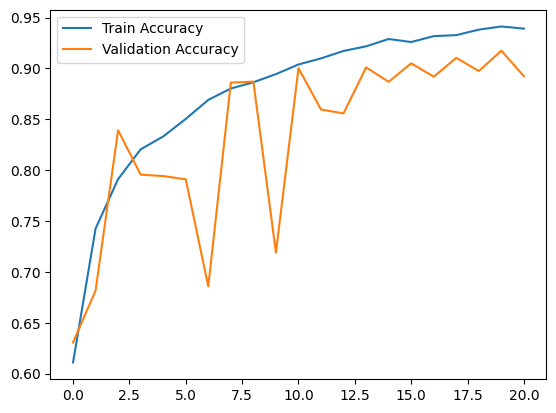

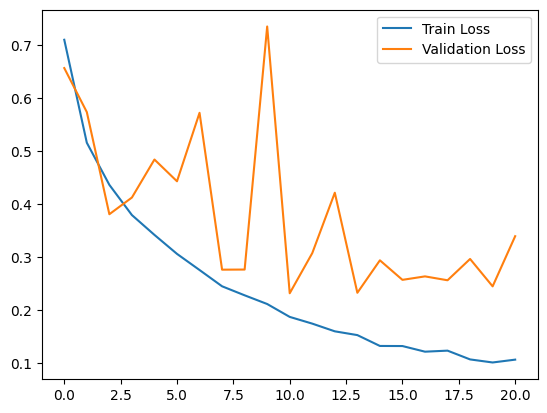

In [59]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int).flatten()  
    y_pred.extend(preds)
    y_true.extend(labels.numpy().flatten())

y_true = np.array(y_true)
y_pred = np.array(y_pred)


cm = confusion_matrix(y_true, y_pred)

class_accuracy = cm.diagonal() / cm.sum(axis=1) * 100

for i, label in enumerate(['Cat', 'Dog']):
    print(f"Accuracy for {label}: {class_accuracy[i]:.2f}%")
print(f'Confusion Matrix\nOverall Accuracy: {accuracy_score(y_true, y_pred)*100:.2f}%')

1/1 [==============================] - 0s 24ms/step
Accuracy for Cat: 94.44%
Accuracy for Dog: 85.60%
Confusion Matrix
Overall Accuracy: 90.02%


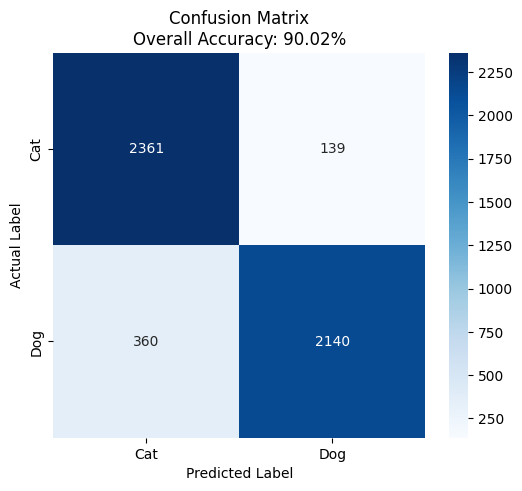

In [115]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat','Dog'], yticklabels=['Cat','Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title(f'Confusion Matrix\nOverall Accuracy: {accuracy_score(y_true, y_pred)*100:.2f}%')
plt.show()

In [86]:
import glob

dog_images = glob.glob("dogs_vs_cats/test/dogs/*.jpg")  # all training dog images

for img_path in dog_images[:5]: import glob
import numpy as np
from PIL import Image

def preprocess_single_image(img_path, target_size=(128,128)):
    img = Image.open(img_path).convert("RGB")      
    img = img.resize(target_size)                   
    img_array = np.array(img, dtype=np.float32) / 255.0 
    img_array = np.expand_dims(img_array, axis=0)        
    return img_array

dog_images = glob.glob("dogs_vs_cats/train/cats/*.jpg")

# Test first 5 images
for img_path in dog_images[:5]:
    img_array = preprocess_single_image(img_path)
    pred = model.predict(img_array)
    
    if pred[0][0] > 0.5:
        print(f"{img_path}: Dog 🐶 (Confidence: {pred[0][0]:.2f})")
    else:
        print(f"{img_path}: Cat 🐱 (Confidence: {1 - pred[0][0]:.2f})")
    img_array = preprocess_single_image(img_path)
    pred = model.predict(img_array)
    if pred[0][0] > 0.5:
        print(f"{img_path}: Dog 🐶 (Confidence: {pred[0][0]:.2f})")
    else:
        print(f"{img_path}: Cat 🐱 (Confidence: {1 - pred[0][0]:.2f})")


1/1 [==============================] - 0s 22ms/step
dogs_vs_cats/train/cats\cat.0.jpg: Cat 🐱 (Confidence: 0.96)
1/1 [==============================] - 0s 23ms/step
dogs_vs_cats/train/cats\cat.0.jpg: Cat 🐱 (Confidence: 0.96)
1/1 [==============================] - 0s 23ms/step
dogs_vs_cats/train/cats\cat.1.jpg: Cat 🐱 (Confidence: 1.00)
1/1 [==============================] - 0s 21ms/step
dogs_vs_cats/train/cats\cat.1.jpg: Cat 🐱 (Confidence: 1.00)
1/1 [==============================] - 0s 22ms/step
dogs_vs_cats/train/cats\cat.100.jpg: Cat 🐱 (Confidence: 1.00)
1/1 [==============================] - 0s 21ms/step
dogs_vs_cats/train/cats\cat.100.jpg: Cat 🐱 (Confidence: 1.00)
1/1 [==============================] - 0s 22ms/step
dogs_vs_cats/train/cats\cat.1000.jpg: Cat 🐱 (Confidence: 1.00)
1/1 [==============================] - 0s 18ms/step
dogs_vs_cats/train/cats\cat.1000.jpg: Cat 🐱 (Confidence: 1.00)
1/1 [==============================] - 0s 21ms/step
dogs_vs_cats/train/cats\cat.10002.jpg: Cat

In [66]:
print(pred[0][0])

0.9319055


In [113]:
import numpy as np
from PIL import Image

def preprocess_single_image(img_path, target_size=(128,128)):
    img = Image.open(img_path).convert("RGB")      
    img = img.resize(target_size)                   
    img_array = np.array(img, dtype=np.float32) / 255.0  
    img_array = np.expand_dims(img_array, axis=0)       
    return img_array

img_path = "WhatsApp Image 2025-08-28 at 02.56.39_d4c2e499.jpg" 

try:
    img_array = preprocess_single_image(img_path)
    pred = model.predict(img_array)
    
    if pred[0][0] > 0.5:
        print(f"{img_path}: Dog 🐶 (Confidence: {pred[0][0]:.2f})")
    else:
        print(f"{img_path}: Cat 🐱 (Confidence: {1 - pred[0][0]:.2f})")
except FileNotFoundError:
    print("File not found. Please check the path and try again.")

1/1 [==============================] - 0s 25ms/step
WhatsApp Image 2025-08-28 at 02.56.39_d4c2e499.jpg: Dog 🐶 (Confidence: 0.76)


In [85]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO

def preprocess_single_image_from_url(url, target_size=(128,128)):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB") 
    img = img.resize(target_size)                                
    img_array = np.array(img, dtype=np.float32) / 255.0         
    img_array = np.expand_dims(img_array, axis=0)                
    return img_array
img_url = "https://images.pexels.com/photos/68594/pexels-photo-68594.jpeg" 
try:
    img_array = preprocess_single_image_from_url(img_url)
    pred = model.predict(img_array)
    
    if pred[0][0] > 0.5:
        print(f"{img_url}: Dog 🐶 (Confidence: {pred[0][0]:.2f})")
    else:
        print(f"{img_url}: Cat 🐱 (Confidence: {1 - pred[0][0]:.2f})")
except Exception as e:
    print("Error:", e)

1/1 [==============================] - 0s 21ms/step
https://images.pexels.com/photos/68594/pexels-photo-68594.jpeg: Cat 🐱 (Confidence: 1.00)


In [99]:
import glob
import random
import numpy as np
from PIL import Image

# Preprocessing function
def preprocess_single_image(img_path, target_size=(128,128)):
    img = Image.open(img_path).convert("RGB")       # Ensure RGB
    img = img.resize(target_size)                   # Resize to match training
    img_array = np.array(img, dtype=np.float32) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)        # Add batch dimension
    return img_array

# Get all images
dog_images_all = glob.glob("dogs_vs_cats/test/dogs/*.jpg")
cat_images_all = glob.glob("dogs_vs_cats/test/cats/*.jpg")

# Pick 5 random images from each
dog_images = random.sample(dog_images_all, 5)
cat_images = random.sample(cat_images_all, 5)

# Prediction function
def predict_images(image_paths):
    for img_path in image_paths:
        img_array = preprocess_single_image(img_path)
        pred = model.predict(img_array)
        if pred[0][0] > 0.5:
            print(f"{img_path}: Dog 🐶 (Confidence: {pred[0][0]:.2f})")
        else:
            print(f"{img_path}: Cat 🐱 (Confidence: {1 - pred[0][0]:.2f})")

print("=== Predicting 5 Random Dog Images ===")
predict_images(dog_images)

print("\n=== Predicting 5 Random Cat Images ===")
predict_images(cat_images)


=== Predicting 5 Random Dog Images ===
1/1 [==============================] - 0s 22ms/step
dogs_vs_cats/test/dogs\dog.11618.jpg: Dog 🐶 (Confidence: 0.98)
1/1 [==============================] - 0s 20ms/step
dogs_vs_cats/test/dogs\dog.3781.jpg: Dog 🐶 (Confidence: 0.93)
1/1 [==============================] - 0s 22ms/step
dogs_vs_cats/test/dogs\dog.8112.jpg: Dog 🐶 (Confidence: 0.72)
1/1 [==============================] - 0s 22ms/step
dogs_vs_cats/test/dogs\dog.5936.jpg: Dog 🐶 (Confidence: 0.96)
1/1 [==============================] - 0s 21ms/step
dogs_vs_cats/test/dogs\dog.9267.jpg: Dog 🐶 (Confidence: 0.79)

=== Predicting 5 Random Cat Images ===
1/1 [==============================] - 0s 23ms/step
dogs_vs_cats/test/cats\cat.7081.jpg: Cat 🐱 (Confidence: 0.98)
1/1 [==============================] - 0s 22ms/step
dogs_vs_cats/test/cats\cat.12184.jpg: Cat 🐱 (Confidence: 0.98)
1/1 [==============================] - 0s 22ms/step
dogs_vs_cats/test/cats\cat.7366.jpg: Cat 🐱 (Confidence: 1.00)
1/1 [==